Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings("ignore")

In [4]:
cocacola_data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Initial Investigation

In [5]:
cocacola_data.shape 

(42, 2)

In [6]:
cocacola_data.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
cocacola_data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

### Data Preprocessing

In [23]:
#We will extract Quarter values and Year values separately from 'Quarter column'
cocacola_data['Quarters'] = 0
cocacola_data['Year'] = 0
for i in range(42):
    p = cocacola_data["Quarter"][i]
    cocacola_data['Quarters'][i]= p[0:2]
    cocacola_data['Year'][i]= p[3:5]

In [24]:
cocacola_data

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [25]:
#Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(cocacola_data['Quarters']))
cocacola_data = pd.concat([cocacola_data,Quarters_Dummies],axis = 1)
cocacola_data

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


### Data Visualization

<AxesSubplot:>

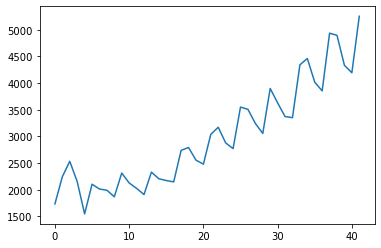

In [26]:
#Line plot for the sales of Cocacola dataset
cocacola_data['Sales'].plot()

From the line plot,we can say that it is upward trend with additive seasonality.

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

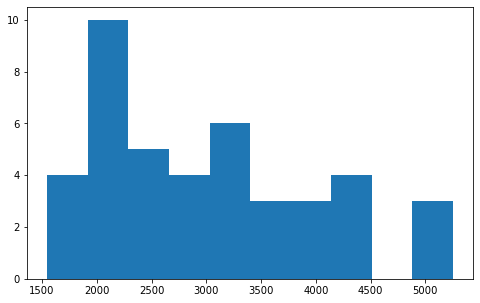

In [27]:
#Histogram
plt.figure(figsize=[8,5])
plt.hist(cocacola_data.Sales)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

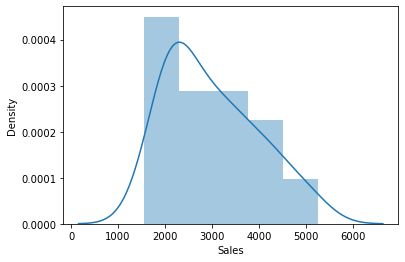

In [28]:
#Density Plot
sns.distplot(cocacola_data.Sales)

From the density plot,we can say that sales data is somewhat normally distributed.

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

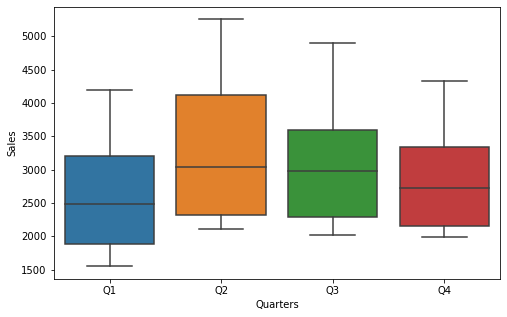

In [33]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Quarters",y="Sales",data=cocacola_data)

Minimum sales are in Quarter 1 and Maximum sales are in Quarter 2

<AxesSubplot:xlabel='Year', ylabel='Sales'>

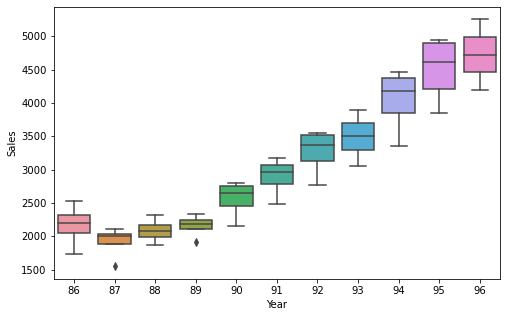

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Year",y="Sales",data=cocacola_data)

Minimum sales are in the year 1987 and Maximum sales are in the year 1996

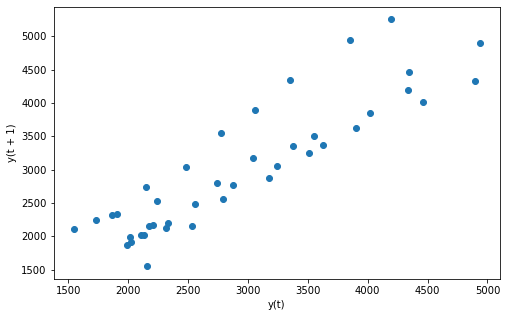

In [41]:
#Lag Plot
plt.figure(figsize=(8,5))
lag_plot(cocacola_data['Sales'])
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

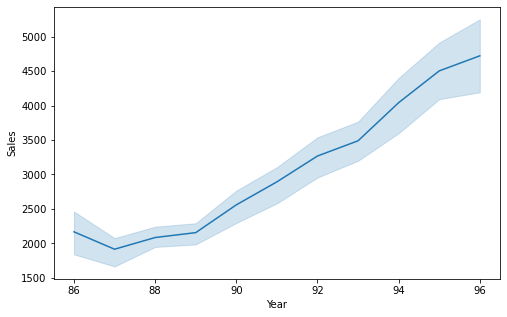

In [42]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=cocacola_data)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

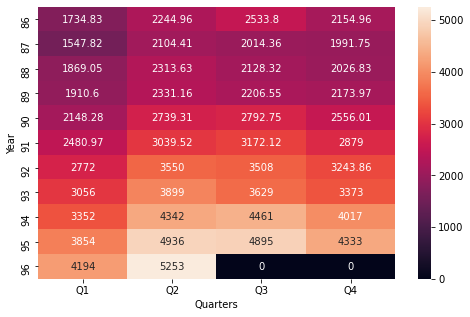

In [43]:
plt.figure(figsize=(8,5))
heatmap_y_month = pd.pivot_table(data=cocacola_data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

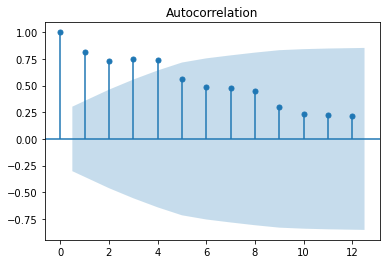

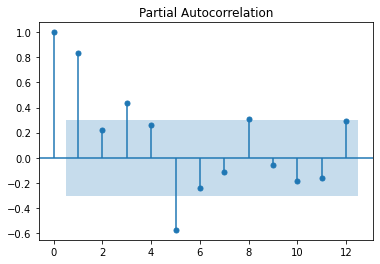

In [48]:
tsa_plots.plot_acf(cocacola_data.Sales,lags=12)
tsa_plots.plot_pacf(cocacola_data.Sales,lags=12)
plt.show()

### Data Driven Forecasting Methods

Splitting the data

In [50]:
Train=cocacola_data.head(32)
Test=cocacola_data.tail(10)

### Moving Average method

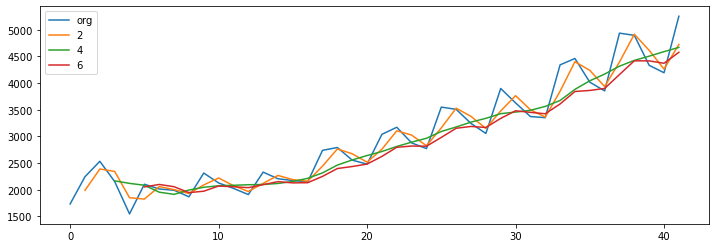

In [52]:
plt.figure(figsize=(12,4))
cocacola_data.Sales.plot(label="org")
for i in range(2,8,2):
    cocacola_data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

With windows=2,we are getting less deviation of the forecasting values with original values

### Time series decomposition plot

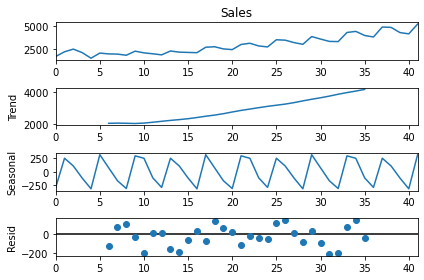

In [54]:
decompose_ts_add = seasonal_decompose(cocacola_data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### Evaluation Metric RMSE

In [56]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### Simple Exponential Method

In [73]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model=RMSE(pred_ses,Test.Sales) 
rmse_ses_model

1172.1756457644592

### Holt Method

In [74]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model=RMSE(pred_hw,Test.Sales) 
rmse_hw_model

888.7798745682942

### Holts winter exponential smoothing with additive seasonality and additive trend

In [75]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model=RMSE(pred_hwe_add_add,Test.Sales) 
rmse_hwe_add_add_model

542.8599219675534

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [76]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model=RMSE(pred_hwe_mul_add,Test.Sales)
rmse_hwe_model_mul_add_model

386.9817361171443

### Model Based Forecasting Methods

In [62]:
#Data preprocessing for models
cocacola_data["t"] = np.arange(1,43)
cocacola_data["t_squared"] = cocacola_data["t"]*cocacola_data["t"]
cocacola_data["log_sales"] = np.log(cocacola_data["Sales"])
cocacola_data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


Splitting the data

In [64]:
Train=cocacola_data.head(32)
Test=cocacola_data.tail(10)

### Linear Model

In [66]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

### Exponential Model

In [67]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076657

### Quadratic Model

In [68]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.7357355407437

### Additive Seasonality Model

In [69]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

### Additive Seasonality Quadratic Model

In [70]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128639

### Multiplicative Seasonality Model

In [71]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836118

### Multiplicative Additive Seasonality Model

In [72]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.8678182692097

In [79]:
#Compare the results 
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
       ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
       ['Linear Model',rmse_linear],['Exp model',rmse_Exp],['Quad model',rmse_Quad],
       ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_quad],
       ['Mult Seasonality',rmse_Mult_sea],['Mult add seasonality',rmse_Mult_add_sea]]

In [80]:
df = pd.DataFrame(list,columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,1172.175646
1,Holt method,888.779875
2,HW exp smoothing add,542.859922
3,HW exp smoothing mult,386.981736
4,Linear Model,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


We can see that we are getting lowest RMSE value for Additive Seasonality Quadratic Model

### Building final model with least RMSE value

In [81]:
cocacola_data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [84]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=cocacola_data).fit()
pred_final = pd.Series(final_model.predict(cocacola_data[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_final_model = RMSE(cocacola_data['Sales'], pred_final)
rmse_final_model

159.05522576522475

In [85]:
pred_df = pd.DataFrame({'Actual' : cocacola_data.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


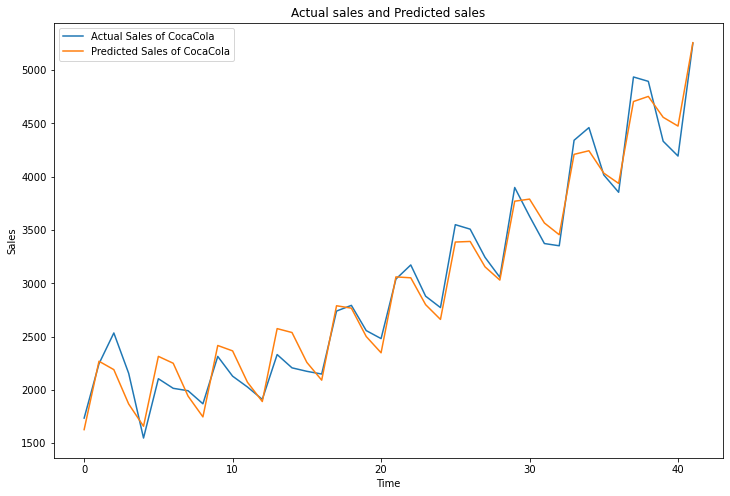

In [91]:
#Plot of Actual sales values and Predicted sales values
plt.plot(cocacola_data.Sales,label='Actual Sales of CocaCola')
plt.plot(pred_final,label='Predicted Sales of CocaCola')

plt.title('Actual sales and Predicted sales')
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (12,8) 
plt.show()